In [1]:
import pandas as pd
import numpy as np

From GoDataDriven Advanced Data Science with Python course

# Modern Pipelines in pandas

## Exercise

Rewrite the following as a pandas pipeline:

In [12]:
sanfran = pd.read_csv('data/san_fran_crime_sample.csv')

<AxesSubplot:title={'center':'Crime Count in San Fransisco'}, xlabel='date'>

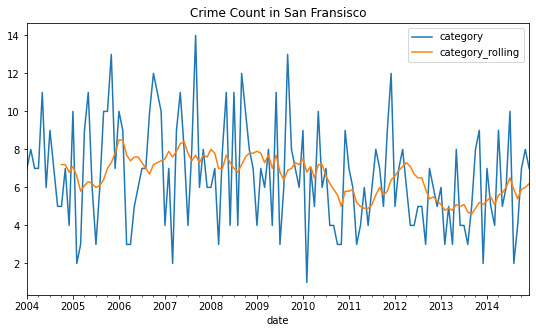

In [13]:
(
    sanfran
    .rename(columns=str.lower)
    .rename(columns={'dates': 'date'})
    .assign(date = lambda df: pd.to_datetime(df['date']))
    .set_index('date')
    .sort_values('date')
    .loc['2004':'2014']
    .resample('M')[['category']].count()
    .assign(category_rolling = lambda df: df['category'].rolling(10).mean())
    .plot(figsize=(9,5), title='Crime Count in San Fransisco')
)

[rename_cols         ] - shape=(1000, 8) time=0.00s
[parse_date_types    ] - shape=(1000, 8) time=0.00s
[set_index           ] - shape=(1000, 7) time=0.00s
[filter_years        ] - shape=(871, 7) time=0.00s
[resample            ] - shape=(132, 1) time=0.01s
[get_category_rolling] - shape=(132, 2) time=0.00s


<AxesSubplot:title={'center':'Crime Count in San Fransisco'}, xlabel='date'>

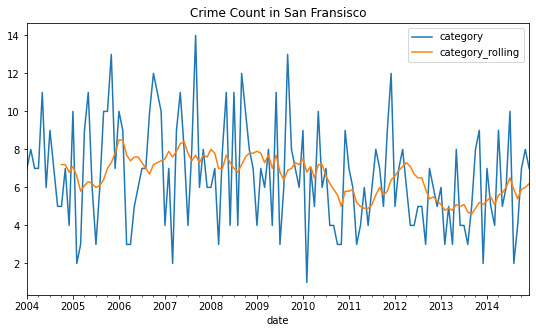

In [14]:
import time
from functools import wraps

def log_pandas_pipefunc(func):

    @wraps(func)
    def wrapper(*args, **kwargs):
        time_before_execution = time.time()
        result = func(*args, **kwargs)
        execution_time = time.time() - time_before_execution
        print(f"[{func.__name__:<20}] - shape={result.shape} time={execution_time:.2f}s")
        return result
    
    return wrapper


@log_pandas_pipefunc
def rename_cols(df, col_names_map):
    return (
        df
        .rename(columns=str.lower)
        .rename(columns=col_names_map)
    )

@log_pandas_pipefunc
def parse_date_types(df, cols=["date"]):
    return df.assign(**{col: lambda df: pd.to_datetime(df[col]) for col in cols})

@log_pandas_pipefunc
def set_index(df, col="date"):
    return df.set_index(col).sort_values(col)

@log_pandas_pipefunc
def filter_years(df, start_year="2000", end_year="2010"):
    return df.loc[start_year:end_year]

@log_pandas_pipefunc
def resample(df, sample="M", value="category", agg="count"):
    return df.resample(sample)[[value]].agg(agg)

@log_pandas_pipefunc
def get_category_rolling(df, window=10, col="category", agg="mean"):
    return df.assign(category_rolling= lambda df: df[col].rolling(window).agg(agg))

sanfran = pd.read_csv('data/san_fran_crime_sample.csv')

sanfran_preprocessed = (
    sanfran
    .pipe(rename_cols, col_names_map={"dates": "date"})
    .pipe(parse_date_types, ["date"])
    .pipe(set_index)
    .pipe(filter_years, start_year="2004", end_year="2014")
    .pipe(resample)
    .pipe(get_category_rolling)
)

sanfran_preprocessed.plot(figsize=(9,5), title='Crime Count in San Fransisco')